In [620]:
import pandas as pd
import numpy as np

# Wczytanie pliku data_2h.csv
df_2h = pd.read_csv('data_2h.csv')

# Wczytanie pliku data_4h.csv
df_4h = pd.read_csv('data_4h.csv')

# Wczytanie pliku data_12h.csv
df_12h = pd.read_csv('data_12h.csv')

text1 = "jest stacjonarny z prawdopodobieństwem wynoszącym"
text2 = "Szereg czasowy"
k1 = " stacjonarny z prawdopodobieństwem wynoszącym "
k2 = " Szereg czasowy "

In [621]:
print(df_4h.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2185 non-null   object 
 1   Open          2185 non-null   float64
 2   High          2185 non-null   float64
 3   Low           2185 non-null   float64
 4   Close         2185 non-null   float64
 5   Volume        2185 non-null   float64
 6   Quote Volume  2185 non-null   float64
dtypes: float64(6), object(1)
memory usage: 119.6+ KB
None


In [622]:
print("Zakres dat - interwał 2h:", df_2h['Date'].min(), df_2h['Date'].max(), len(df_2h['Date']), "elementów" )
print("Zakres dat - interwał 4h:", df_4h['Date'].min(), df_4h['Date'].max(),len(df_4h['Date']), "elementów" )
print("Zakres dat - interwał 12h:", df_12h['Date'].min(), df_12h['Date'].max(),len(df_12h['Date']), "elementów" )

Zakres dat - interwał 2h: 2022-03-06 01:00:00 2022-11-11 01:00:00 3001 elementów
Zakres dat - interwał 4h: 2021-11-12 01:00:00 2022-11-11 01:00:00 2185 elementów
Zakres dat - interwał 12h: 2021-11-12 01:00:00 2022-11-11 01:00:00 729 elementów


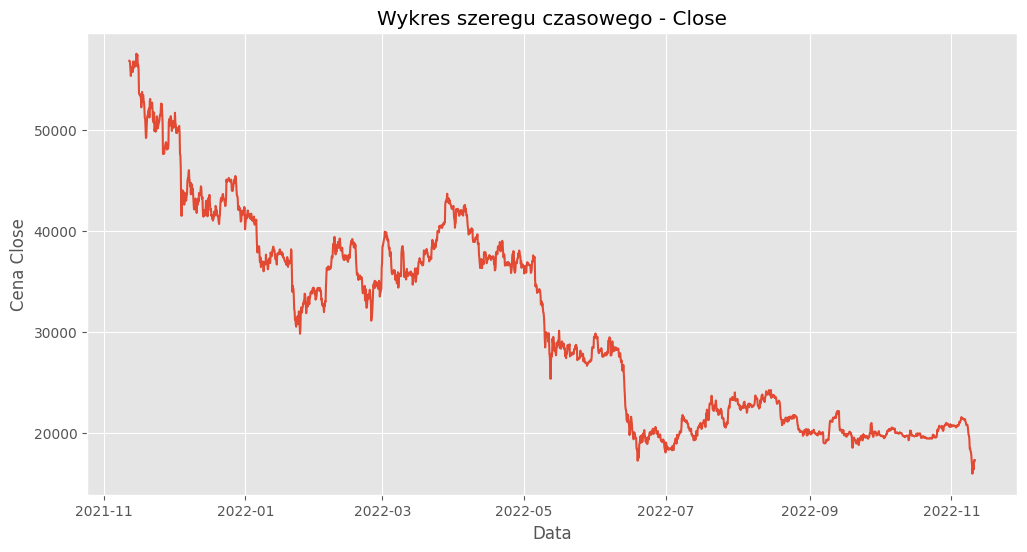

In [623]:
import matplotlib.pyplot as plt

df_4h_copy = df_4h
df_4h_copy['Date'] = pd.to_datetime(df_4h_copy['Date'])
# Ustawienie kolumny "Date" jako indeksu DataFrame
df_4h_copy.set_index("Date", inplace=True)

# Generowanie wykresu
plt.figure(figsize=(12, 6))
plt.plot(df_4h_copy["Close"])
plt.title("Wykres szeregu czasowego - Close")
plt.xlabel("Data")
plt.ylabel("Cena Close")
plt.grid(True)
plt.show()

UPSAMPLING

In [624]:
df_2h_forward_fill = df_4h.resample('2H').ffill()
df_2h_backward_fill = df_4h.resample('2H').bfill()
df_2h_rolling_mean = df_4h['Close'].rolling('2H').mean()

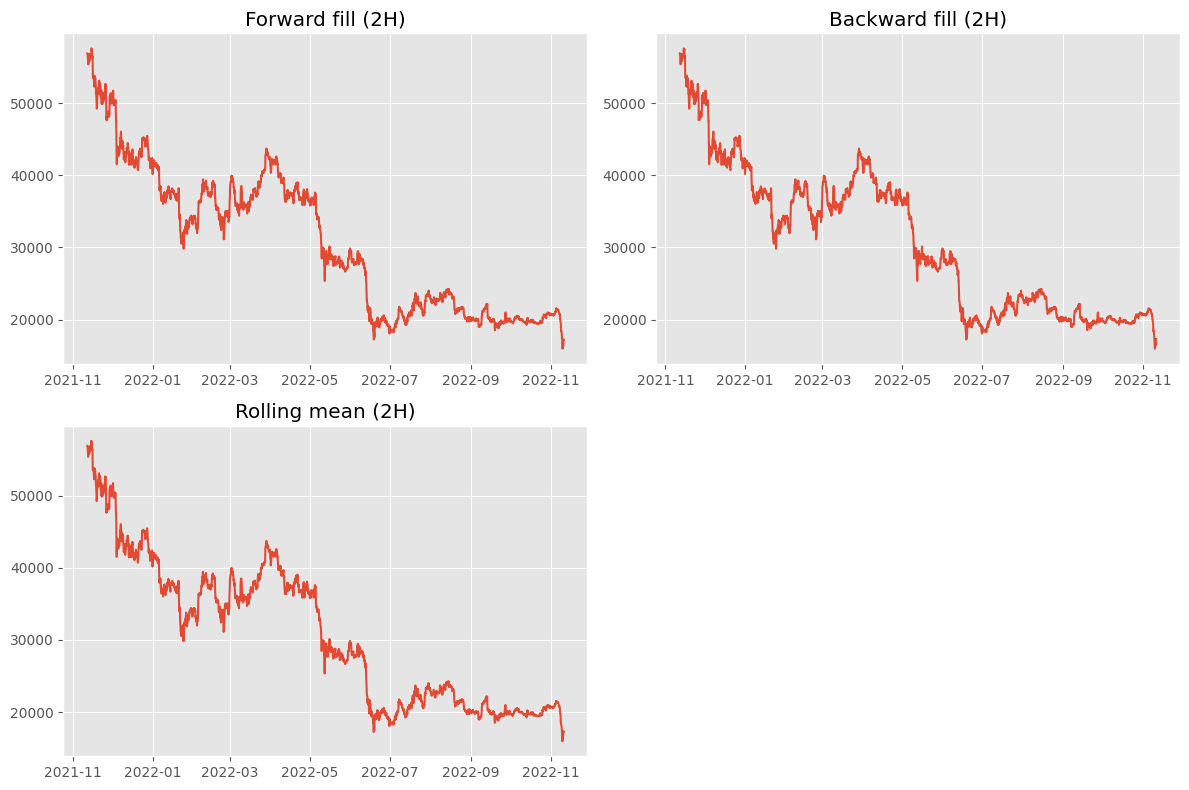

In [625]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(df_2h_forward_fill['Close'])
plt.title('Forward fill (2H)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df_2h_backward_fill['Close'])
plt.title('Backward fill (2H)')
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(df_2h_rolling_mean)
plt.title('Rolling mean (2H)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [626]:
df_2h_forward_fill.index = pd.to_datetime(df_2h_forward_fill.index)
df_2h_forward_fill.index = df_2h_forward_fill.index + pd.DateOffset(hours=1)
df_2h_backward_fill.index = pd.to_datetime(df_2h_backward_fill.index)
df_2h_backward_fill.index = df_2h_backward_fill.index + pd.DateOffset(hours=1)

In [627]:
forward = df_2h_forward_fill['Close'][-len(df_2h):][::-1]

errors = []
df_2h_close_reset = df_2h['Close'].reset_index(drop=True)
for i in range(len(forward)):
    error = (forward[i] - df_2h_close_reset[i]) ** 2
    errors.append(error)

rmse = np.sqrt(np.mean(errors))
print("Błąd średniokwadratowy Forward fill dla fragmentu zbioru danych:", rmse)

# Resetowanie indeksów
forward.reset_index(drop=True, inplace=True)
df_2h['Close'].reset_index(drop=True, inplace=True)

# Obliczanie błędu średniokwadratowego (RMSE)
rmse = np.sqrt(((forward - df_2h['Close']) ** 2).mean())

print("Błąd średniokwadratowy Forward fill dla 1 jednostki czasu: ", rmse/len(df_2h['Close']))

backward = df_2h_backward_fill['Close'][-len(df_2h):][::-1]

errors = []
df_2h_close_reset = df_2h['Close'].reset_index(drop=True)
for i in range(len(backward)):
    error = (backward[i] - df_2h_close_reset[i]) ** 2
    errors.append(error)

rmse = np.sqrt(np.mean(errors))
print("Błąd średniokwadratowy Backward fill dla fragmentu zbioru danych:", rmse)

# Resetowanie indeksów
backward.reset_index(drop=True, inplace=True)
df_2h['Close'].reset_index(drop=True, inplace=True)

# Obliczanie błędu średniokwadratowego (RMSE)
rmse = np.sqrt(((backward - df_2h['Close']) ** 2).mean())

print("Błąd średniokwadratowy Backward fill dla 1 jednostki czasu: ", rmse/len(df_2h['Close']))

rolling_mean_normal = df_2h_rolling_mean[-len(df_2h):][::-1]

errors = []
df_2h_close_reset = df_2h['Close'].reset_index(drop=True)
for i in range(len(rolling_mean_normal)):
    error = (rolling_mean_normal[i] - df_2h_close_reset[i]) ** 2
    errors.append(error)

rmse = np.sqrt(np.mean(errors))
print("Błąd średniokwadratowy średniej ruchomej dla fragmentu zbioru danych:", rmse)

rolling_mean_normal.reset_index(drop=True, inplace=True)
df_2h['Close'].reset_index(drop=True, inplace=True)

rmse = np.sqrt(((rolling_mean_normal - df_2h['Close']) ** 2).mean())
print("Błąd średniokwadratowy średniej ruchomej dla 1 jednostki czasu: ", rmse/len(df_2h['Close']))

Błąd średniokwadratowy Forward fill dla fragmentu zbioru danych: 13511.91693733418
Błąd średniokwadratowy Forward fill dla 1 jednostki czasu:  4.502471488615188
Błąd średniokwadratowy Backward fill dla fragmentu zbioru danych: 13514.561855203954
Błąd średniokwadratowy Backward fill dla 1 jednostki czasu:  4.503352834123277
Błąd średniokwadratowy średniej ruchomej dla fragmentu zbioru danych: 17176.655770287012
Błąd średniokwadratowy średniej ruchomej dla 1 jednostki czasu:  5.723644042081643


DOWNSAMPLING

In [628]:
df_12h_modified = df_4h.resample('12H').apply(lambda x: x.mean())

In [629]:
df_12h_modified.index = pd.to_datetime(df_12h_modified.index)
df_12h_modified.index = df_12h_modified.index + pd.DateOffset(hours=1)

In [630]:
print(df_12h_modified["Close"])

Date
2021-11-12 01:00:00    56796.466667
2021-11-12 13:00:00    55779.523333
2021-11-13 01:00:00    56136.160000
2021-11-13 13:00:00    56252.303333
2021-11-14 01:00:00    56720.380000
                           ...     
2022-11-09 01:00:00    18274.953333
2022-11-09 13:00:00    17299.986667
2022-11-10 01:00:00    16377.053333
2022-11-10 13:00:00    16934.746667
2022-11-11 01:00:00    17303.000000
Name: Close, Length: 729, dtype: float64


In [631]:
print("Kolumny w df_12h:", df_12h.columns)
print("Kolumny w df_12h_modified:", df_12h_modified.columns)


Kolumny w df_12h: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Quote Volume'], dtype='object')
Kolumny w df_12h_modified: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Volume'], dtype='object')


In [632]:
#Brak kolumny i niezgodność idneksów, trzeba poprawić
df_12h_modified.set_index(df_12h.index, inplace=True)
print(df_12h_modified["Close"])

0      56796.466667
1      55779.523333
2      56136.160000
3      56252.303333
4      56720.380000
           ...     
724    18274.953333
725    17299.986667
726    16377.053333
727    16934.746667
728    17303.000000
Name: Close, Length: 729, dtype: float64


In [633]:
print(df_12h["Close"])

0      56892.10
1      55942.08
2      56274.32
3      55781.28
4      56576.66
         ...   
724    18482.98
725    17839.19
726    15958.24
727    16371.28
728    17303.00
Name: Close, Length: 729, dtype: float64


In [634]:
rmse = np.sqrt(((df_12h_modified['Close'] - df_12h['Close']) ** 2).mean())
print("Błąd średniokwadratowy:", rmse)
print("Błąd średniokwadratowy dla 1 jednostki czasu:", rmse/len(df_12h['Close']))

Błąd średniokwadratowy: 351.515376479651
Błąd średniokwadratowy dla 1 jednostki czasu: 0.48218844510240194


ANALIZA

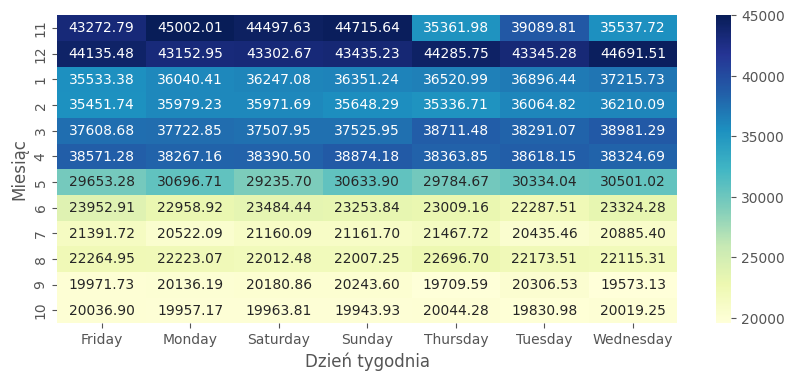

In [635]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przekształcenie DataFrame
df_4h['DayOfWeek'] = df_4h.index.day_name()
df_4h['Month'] = df_4h.index.month

# Tworzenie mapy ciepła
heatmap_data = df_4h.pivot_table(values='Close', index='Month', columns='DayOfWeek', aggfunc='mean')

# Zmiana kolejności wierszy dla miesięcy
heatmap_data = heatmap_data.iloc[[10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

# Tworzenie wykresu z zamienionymi osiami
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xlabel('Dzień tygodnia')
plt.ylabel('Miesiąc')
plt.show()


In [636]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

df_4h['DayOfWeek'] = df_4h.index.day_name()
df_4h['Month'] = df_4h.index.month
heatmap_data = df_4h.pivot_table(values='Close', index='Month', columns='DayOfWeek', aggfunc='mean')
heatmap_data = heatmap_data.iloc[[10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
english_to_polish_days = {
    'Monday': 'Poniedziałek',
    'Tuesday': 'Wtorek',
    'Wednesday': 'Środa',
    'Thursday': 'Czwartek',
    'Friday': 'Piątek',
    'Saturday': 'Sobota',
    'Sunday': 'Niedziela'
}
heatmap_data.columns = [english_to_polish_days[day] for day in heatmap_data.columns]
new_day_order = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
heatmap_data = heatmap_data[new_day_order]
new_month_order = ['Listopad', 'Grudzień', 'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec',
                   'Lipiec', 'Sierpień', 'Wrzesień', 'Październik']

fig = go.Figure(data=[
    go.Surface(z=heatmap_data.values, x=heatmap_data.columns, y=new_month_order, colorscale='YlGnBu')
])
fig.update_layout(scene=dict(
                    xaxis_title='Dzień tygodnia',
                    yaxis_title='Miesiąc',
                    zaxis_title='Cena zamknięcia'),
                    title='Interaktywny wykres 3D mapy ciepła ceny zamknięcia w zależności od miesiąca i dnia tygodnia')
fig.show()

fig.write_html("Interactive3D2.html")

In [637]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy surowe dane są stacjonarne?")
dftest = adfuller(df_4h['Close'], autolag='AIC')
print("Statystyka testowa = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1]))) 
    
    
from statsmodels.tsa.stattools import kpss

print(" > Czy surowe dane są stacjonarne?")
p = kpss(df_4h['Close'])
print("Statystyka testowa = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy surowe dane są stacjonarne?
Statystyka testowa = -2.197
Wartości krytyczne:
	1%: -3.433 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.863 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.567 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%
 > Czy surowe dane są stacjonarne?
Statystyka testowa = 6.604
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy nie jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




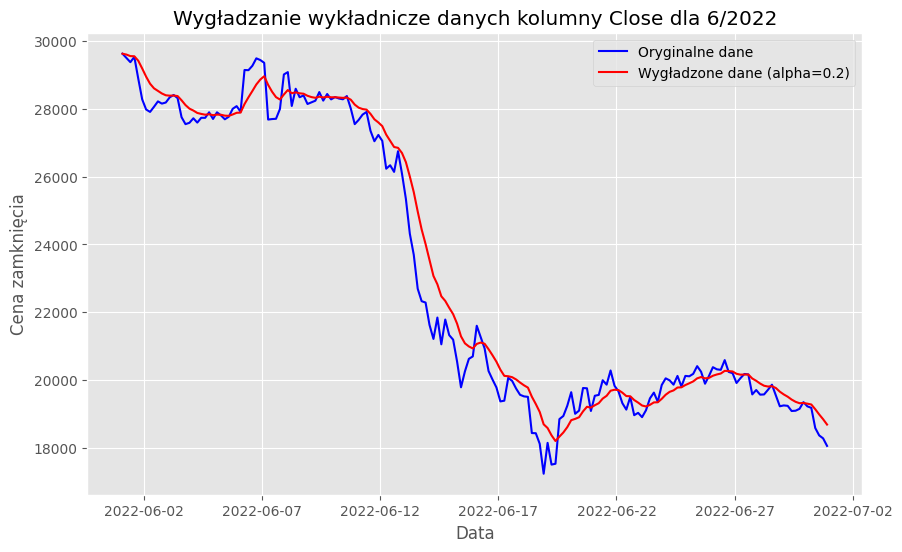

In [638]:
import matplotlib.dates as mdates

def exponential_smoothing(series, alpha):
    smoothed_series = series.ewm(alpha=alpha, adjust=False).mean()
    return smoothed_series
alpha = 0.2
selected_month = 6
selected_year = 2022
selected_data = df_4h[(df_4h.index.month == selected_month) & (df_4h.index.year == selected_year)]
smoothed_close = exponential_smoothing(selected_data['Close'], alpha)
plt.figure(figsize=(10, 6))
plt.plot(selected_data.index, selected_data['Close'], label='Oryginalne dane', color='blue')
plt.plot(selected_data.index, smoothed_close, label=f'Wygładzone dane (alpha={alpha})', color='red')
plt.title(f'Wygładzanie wykładnicze danych kolumny Close dla {selected_month}/{selected_year}')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

DEKOMPOZYCJA

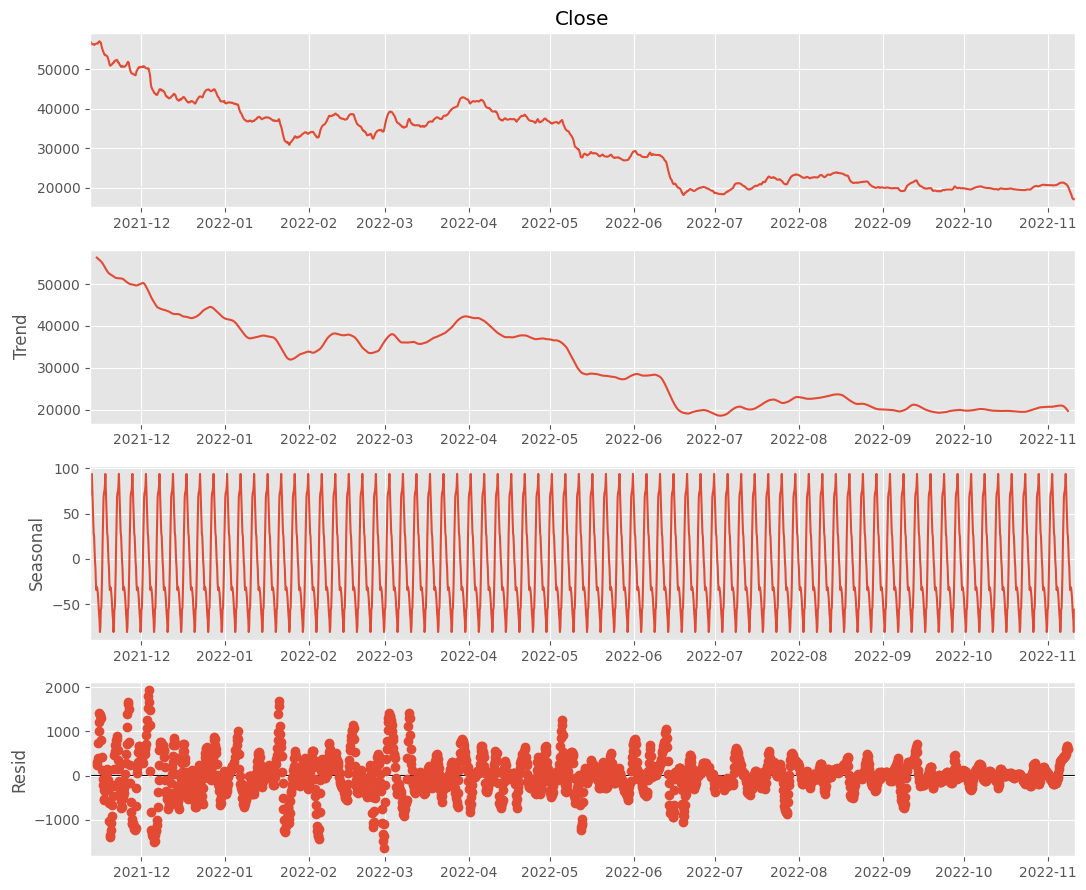

In [639]:
import statsmodels.api as sm

smoothed_all_data = exponential_smoothing(df_4h['Close'], alpha)
plt.rcParams['figure.figsize'] = 11, 9
decomposed_df_4h = sm.tsa.seasonal_decompose(smoothed_all_data,period=30)
decomposed_df_4h.plot()
plt.show();

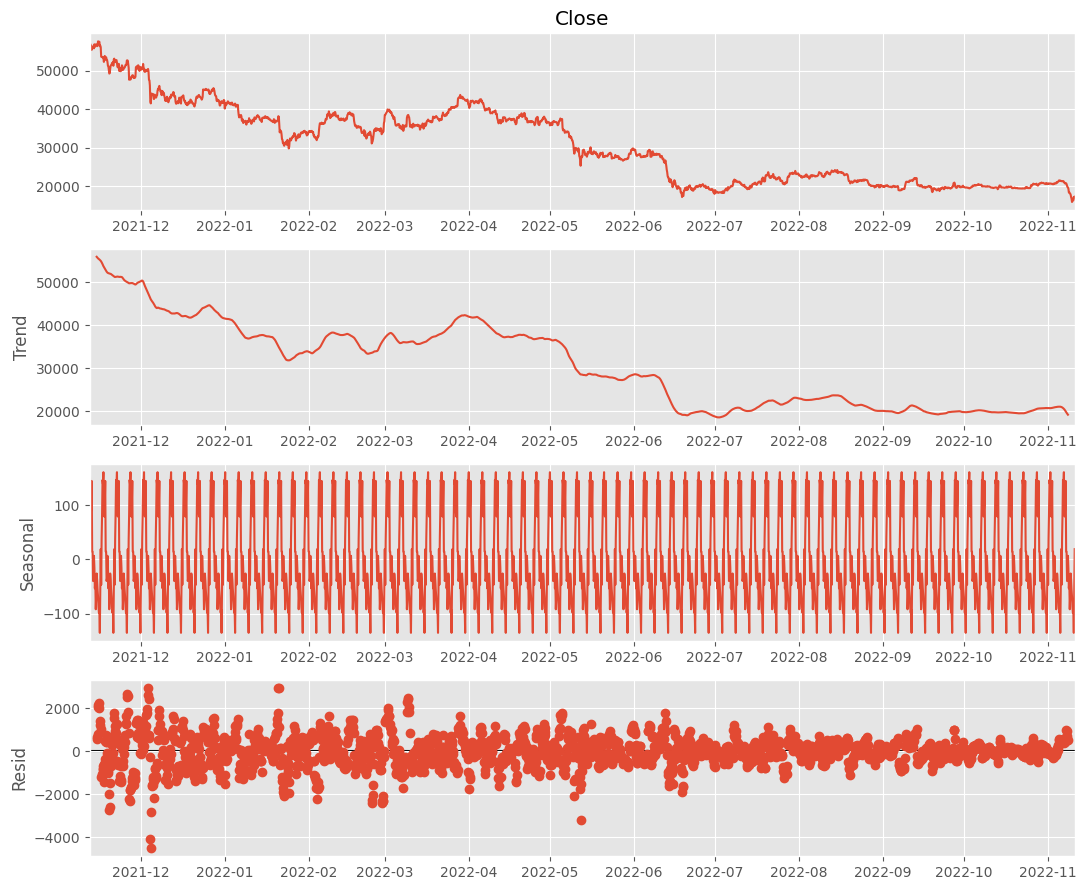

In [640]:
import statsmodels.api as sm

smoothed_all_data = exponential_smoothing(df_4h['Close'], alpha)
plt.rcParams['figure.figsize'] = 11, 9
decomposed_df_4h = sm.tsa.seasonal_decompose(df_4h['Close'],period=30)
decomposed_df_4h.plot()
plt.show();

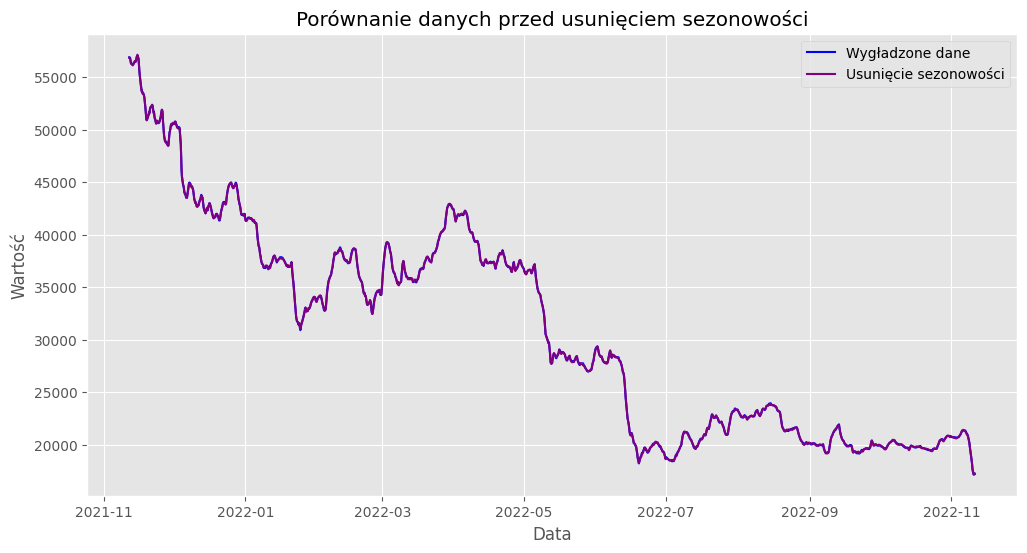

In [641]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Wygładzenie danych
smoothed_all_data = exponential_smoothing(df_4h['Close'], alpha)

# Dekompozycja
decomposed_df_4h = sm.tsa.seasonal_decompose(smoothed_all_data, period=30)

# Składnik trendu
trend_component = decomposed_df_4h.trend.dropna()  # Składnik trendu
seasonal_component = decomposed_df_4h.seasonal.dropna()  # Składnik sezonowy

# Usunięcie składnika sezonowego
modified_component = smoothed_all_data -  seasonal_component

# Wykres przed usunięciem sezonowości i po usunięciu
plt.figure(figsize=(12, 6))
plt.plot(smoothed_all_data.index, smoothed_all_data, label='Wygładzone dane', color='blue')
plt.plot(smoothed_all_data.index, modified_component, label='Usunięcie sezonowości', color='purple')
plt.title('Porównanie danych przed usunięciem sezonowości')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()

In [642]:
from sklearn.metrics import mean_squared_error
smoothed_all_data = smoothed_all_data.dropna()
modified_component = modified_component.dropna()
smoothed_all_data = smoothed_all_data.loc[modified_component.index]
rmse_smoothed_vs_modified = np.sqrt(mean_squared_error(smoothed_all_data, modified_component))
print(f"RMSE wygładzonego szeregu i szeregu bez sezonowości: {rmse_smoothed_vs_modified:.4f}")

RMSE wygładzonego szeregu i szeregu bez sezonowości: 53.0865


In [643]:
modified_component

Date
2021-11-12 01:00:00    56824.097737
2021-11-12 05:00:00    56815.347276
2021-11-12 09:00:00    56760.875216
2021-11-12 13:00:00    56576.336072
2021-11-12 17:00:00    56308.783140
                           ...     
2022-11-10 09:00:00    17386.228345
2022-11-10 13:00:00    17201.535226
2022-11-10 17:00:00    17243.852074
2022-11-10 21:00:00    17236.414339
2022-11-11 01:00:00    17245.721856
Length: 2185, dtype: float64

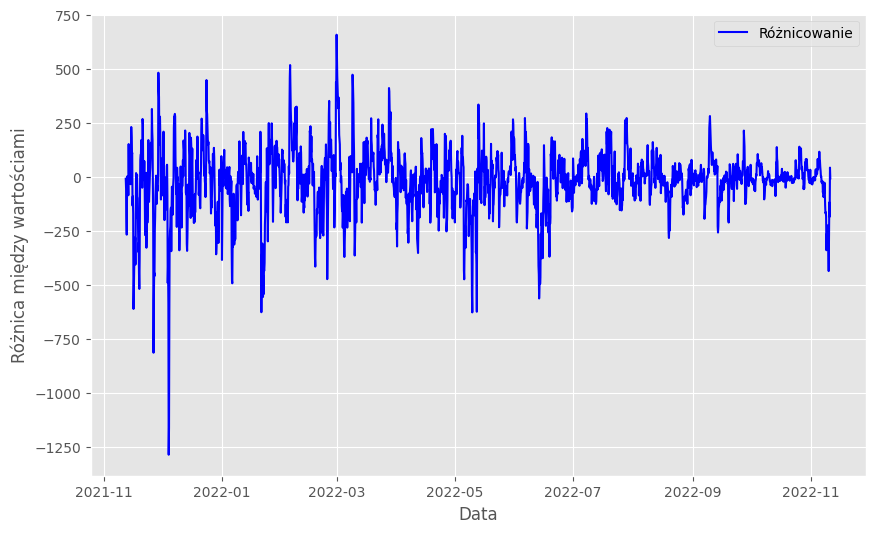

In [644]:
diff_modified_component = modified_component.diff().dropna()
diff_modified_component = diff_modified_component.iloc[:-1]
plt.figure(figsize=(10, 6))
plt.plot(diff_modified_component.index, diff_modified_component.values, label='Różnicowanie', color='blue')
plt.xlabel('Data')
plt.ylabel('Różnica między wartościami')
plt.legend()
plt.show()

In [645]:
sd_diff = np.std(diff_modified_component)
mean_diff = np.mean((diff_modified_component))
std_deviation = df_4h["Close"].std()
print(f"Odchylenie standardowe surowych danych: {std_deviation:.4f}")
print(f"Odchylenie standardowe różnicowania: {sd_diff:.4f}")
print(f"Średnia danych różnicowania: {mean_diff:.4f}")

Odchylenie standardowe surowych danych: 10008.4705
Odchylenie standardowe różnicowania: 145.5965
Średnia danych różnicowania: -18.1345


In [646]:
from statsmodels.tsa.stattools import adfuller

print(" > Czy zmodyfikowane dane są stacjonarne?")
dftest = adfuller(diff_modified_component, autolag='AIC')
print("Statystyka testowa = {:.3f}".format(dftest[0]))
print("Wartości krytyczne:")

for k, v in dftest[4].items():
    print("\t{}: {:.3f} - {} {} {} {}%".format(k, round(v, 3), text2,"nie" if v < dftest[0] else "", text1, 100-int(k[:-1]))) 
    
    
from statsmodels.tsa.stattools import kpss

print(" > Czy zmodyfikowane dane są stacjonarne?")
p = kpss(diff_modified_component)
print("Statystyka testowa = {:.3f}".format(p[0]))
print("Wartości krytyczne:")

for k, v in p[3].items():
    print("\t{}: {:.3f} -{}{}{}{:.0f}%".format(k, round(v, 3), k2, "jest" if p[0] < v else "nie jest", k1, 100 - float(k[:-1])))

 > Czy zmodyfikowane dane są stacjonarne?
Statystyka testowa = -14.146
Wartości krytyczne:
	1%: -3.433 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 99%
	5%: -2.863 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	10%: -2.567 - Szereg czasowy  jest stacjonarny z prawdopodobieństwem wynoszącym 90%
 > Czy zmodyfikowane dane są stacjonarne?
Statystyka testowa = 0.187
Wartości krytyczne:
	10%: 0.347 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 90%
	5%: 0.463 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 95%
	2.5%: 0.574 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 98%
	1%: 0.739 - Szereg czasowy jest stacjonarny z prawdopodobieństwem wynoszącym 99%


C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




C:\Users\Admin\anaconda3\envs\bitehack\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



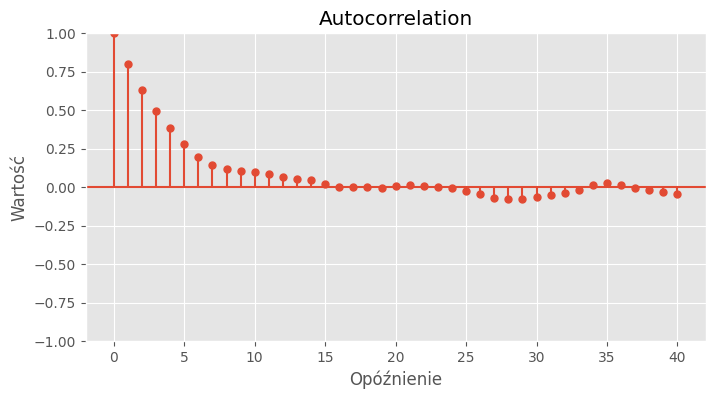

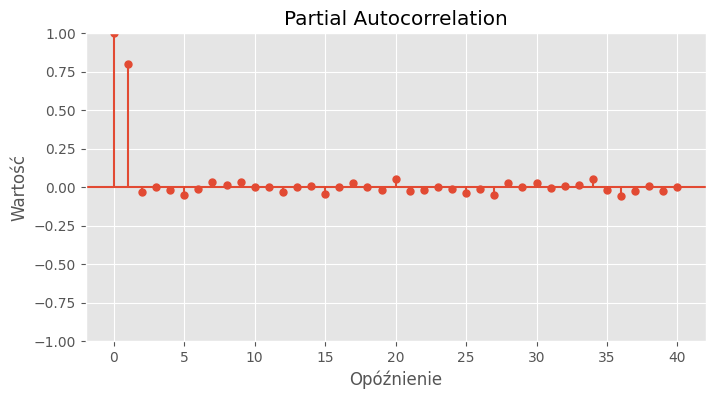

In [647]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(diff_modified_component, lags=40, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(diff_modified_component, lags=40, ax=ax, alpha=None)
ax.set_xlabel('Opóźnienie')
ax.set_ylabel('Wartość')

plt.show()